In [1]:
from dq_agent import Agent
import numpy as np
import gym

In [2]:
if __name__ == '__main__':
    env = gym.make('CartPole-v1')
    best_score = -np.inf
    load_checkpoint = False
    record_agent = False
    n_games = 10000
    agent = Agent(gamma=0.99, epsilon=1, lr=0.0001, input_dims=(env.observation_space.shape), 
                  n_actions=env.action_space.n, mem_size=50000, eps_min=0.1, batch_size=32, replace=1000, 
                  eps_dec=1e-5)

    n_steps = 0
    scores, eps_history, steps_array = [], [], []

    for i in range(n_games):
        done = False
        observation = env.reset()

        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward

            if not load_checkpoint:
                agent.store_transition(observation, action,
                                       reward, observation_, done)
                agent.learn()
            observation = observation_
            n_steps += 1
        scores.append(score)
        steps_array.append(n_steps)

        avg_score = np.mean(scores[-100:])

        if i % 100 == 0:
            print(f'episode {i} score {score:.1f} avg score {avg_score:.1f} best score {best_score:.1f} epsilon {agent.epsilon:.2f} steps {n_steps}')
 

        if score > best_score:
            best_score = score

        eps_history.append(agent.epsilon)

    x = [i+1 for i in range(len(scores))]

episode 0 score 17.0 avg score 17.0 best score -inf epsilon 1.00 steps 17
episode 100 score 17.0 avg score 23.0 best score 77.0 epsilon 0.98 steps 2314
episode 200 score 37.0 avg score 22.4 best score 77.0 epsilon 0.95 steps 4549
episode 300 score 15.0 avg score 22.7 best score 77.0 epsilon 0.93 steps 6816
episode 400 score 31.0 avg score 26.4 best score 77.0 epsilon 0.91 steps 9455
episode 500 score 37.0 avg score 25.6 best score 77.0 epsilon 0.88 steps 12011
episode 600 score 40.0 avg score 31.9 best score 89.0 epsilon 0.85 steps 15199
episode 700 score 14.0 avg score 31.0 best score 109.0 epsilon 0.82 steps 18295
episode 800 score 15.0 avg score 41.7 best score 145.0 epsilon 0.78 steps 22466
episode 900 score 91.0 avg score 40.3 best score 145.0 epsilon 0.74 steps 26496
episode 1000 score 56.0 avg score 38.9 best score 146.0 epsilon 0.70 steps 30384
episode 1100 score 81.0 avg score 44.9 best score 164.0 epsilon 0.65 steps 34878
episode 1200 score 22.0 avg score 55.3 best score 243.

In [4]:
import matplotlib.pyplot as plt

NameError: name 'lines' is not defined

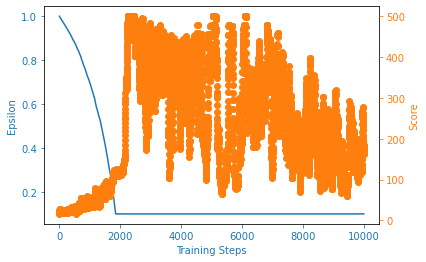

In [6]:
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, eps_history, color="C0")
    ax.set_xlabel("Training Steps", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
	    running_avg[t] = np.mean(scores[max(0, t-20):(t+1)])

    ax2.scatter(x, running_avg, color="C1")
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Score', color="C1")
    ax2.yaxis.set_label_position('right')
    ax2.tick_params(axis='y', colors="C1")
